<h1><center>ML Assignment 1</center></h1>

 ### Problem Statement: Predict class of Iris plant using a decision tree
- Import the data from Iris Dataset (Links to an external site.) (1 point)
- Consider all columns as independent variables and assign to variable X except the last column and consider the last column as dependent variable and assign to variable y. Remove columns which don’t help the problem statement. (1 point) 
- Compute some basic statistical details like percentile, mean, standard deviation of dataset (1 point)
- Encode all the categorical columns into numeric (1 point)
- Do Feature Scaling on Independent variables (2 points)
- Split the data into train and test dataset (1 point)
- Use sklearn library to train on train dataset on decision tree and predict on test dataset  (3 points)
- Compute the accuracy and precision. (2 points)



## 1. Package Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,f1_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score

## 2. Import the data from Iris Dataset 

In [2]:
datasetURL = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(datasetURL, names=["sepal_len_in_cm", "sepal_wid_in_cm", "petal_len_in_cm","petal_wid_in_cm", "plant_class"])

Let's have a look at the data

In [3]:
df.head()

,sepal_len_in_cm,sepal_wid_in_cm,petal_len_in_cm,petal_wid_in_cm,plant_class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Deatils of the imported data

In [4]:
df.shape

(150, 5)

150 rows of data is captured along with the 5 interesting characteristics!

Lets have a quick look at the columns and their respective data types.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_len_in_cm  150 non-null    float64
 1   sepal_wid_in_cm  150 non-null    float64
 2   petal_len_in_cm  150 non-null    float64
 3   petal_wid_in_cm  150 non-null    float64
 4   plant_class      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Except last column("plant_class") all the columns are in Numeric

## 3. Assigning independent(features) and dependent(expected) varaibles

In [6]:
features = ['sepal_len_in_cm', 'sepal_wid_in_cm', 'petal_len_in_cm', 'petal_wid_in_cm']
classnames = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
X = df[features]
y = df['plant_class']

## 4. Encode all the categorical columns into numeric 

In [7]:
le = LabelEncoder()
y = le.fit_transform(y)

## 5. Compute some basic statistical details like percentile, mean, standard deviation of dataset 

In [8]:
df.describe()

,sepal_len_in_cm,sepal_wid_in_cm,petal_len_in_cm,petal_wid_in_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


EDA(Explarotary data analysis)

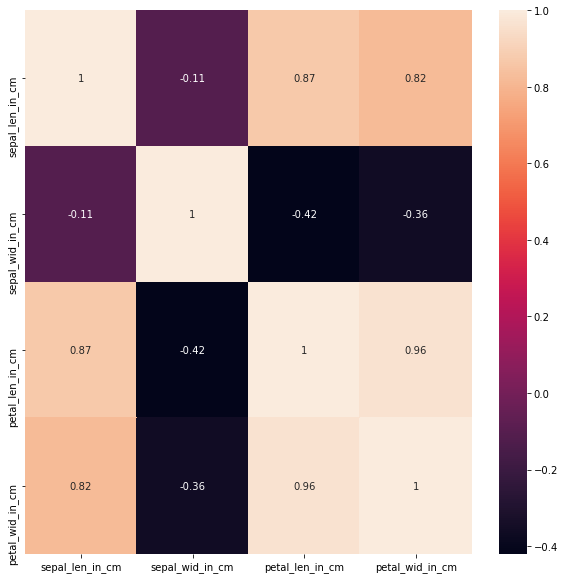

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

The main takeaway is that the petal measurements have highly positive correlation, while the sepal one are uncorrelated. Note that the petal features also have relatively high correlation with sepal_length, but not with sepal_width.

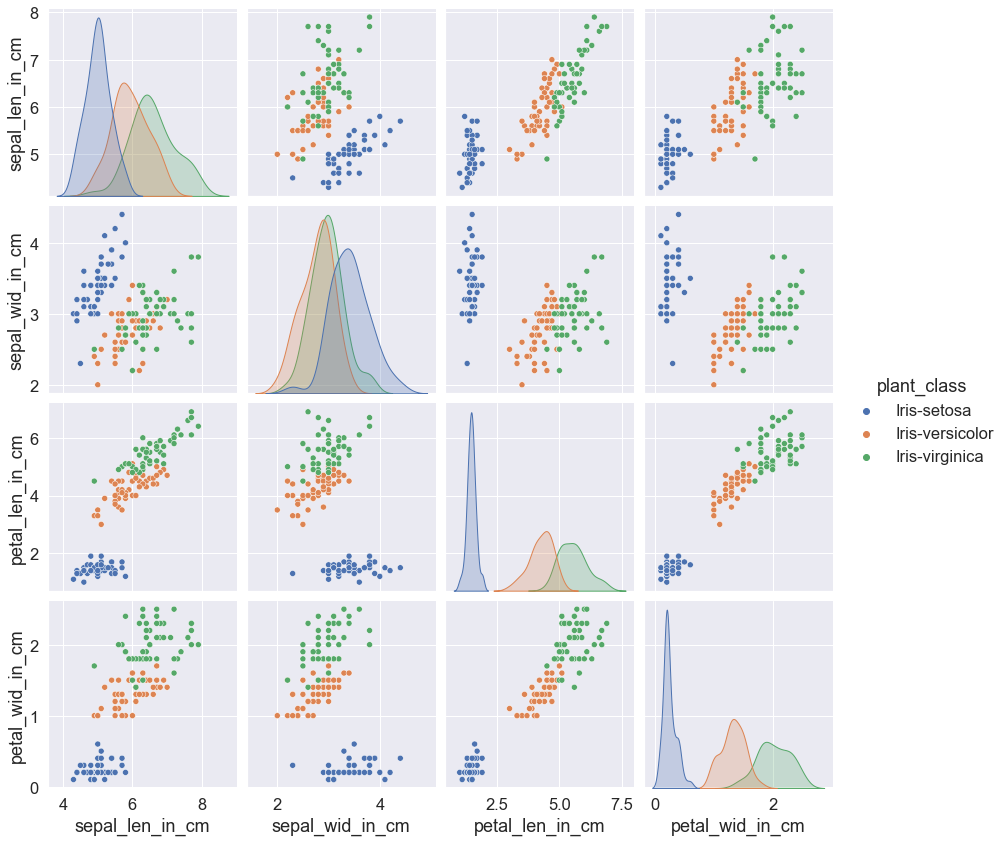

In [10]:
sns.set(font_scale=1.5)
sns.pairplot(df, hue="plant_class", height=3);
plt.show()

## 6. Do Feature Scaling on Independent variables

Using standard scaler to scale the indepedent variables

In [11]:
sc = StandardScaler()
X = sc.fit_transform(X)

## 7. Use sklearn library to train on train dataset on decision tree and predict on test dataset 

Using sklearn library to split the data into train and test dataset

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Using sklearn library to train the Decision Tree model

In [13]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

Predicting the outcome using the test dataset

In [14]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[2 2]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]]


## 7. Compute the accuracy and precision

In [15]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


1.0

We can see in the confusion matrix all are showing as True Positives, since we can say that model accuracy is 100%. 

In [16]:
precision_score(y_test, y_pred, average='micro')

1.0

In [17]:
score = f1_score(y_test, y_pred, average='micro')

In [18]:
score

1.0

We can see precision is 1, it means all the predicted and expected classification is correct and accurate.

[Text(418.5, 747.4499999999999, 'petal_wid_in_cm <= -0.524\nentropy = 1.581\nsamples = 120\nvalue = [39, 37, 44]\nclass = Iris-virginica'),
 Text(354.11538461538464, 611.55, 'entropy = 0.0\nsamples = 39\nvalue = [39, 0, 0]\nclass = Iris-setosa'),
 Text(482.8846153846154, 611.55, 'petal_wid_in_cm <= 0.725\nentropy = 0.995\nsamples = 81\nvalue = [0, 37, 44]\nclass = Iris-virginica'),
 Text(257.53846153846155, 475.65, 'petal_len_in_cm <= 0.677\nentropy = 0.469\nsamples = 40\nvalue = [0, 36, 4]\nclass = Iris-versicolor'),
 Text(128.76923076923077, 339.74999999999994, 'petal_wid_in_cm <= 0.593\nentropy = 0.187\nsamples = 35\nvalue = [0, 34, 1]\nclass = Iris-versicolor'),
 Text(64.38461538461539, 203.8499999999999, 'entropy = 0.0\nsamples = 34\nvalue = [0, 34, 0]\nclass = Iris-versicolor'),
 Text(193.15384615384616, 203.8499999999999, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Iris-virginica'),
 Text(386.3076923076923, 339.74999999999994, 'petal_wid_in_cm <= 0.462\nentropy = 0.9

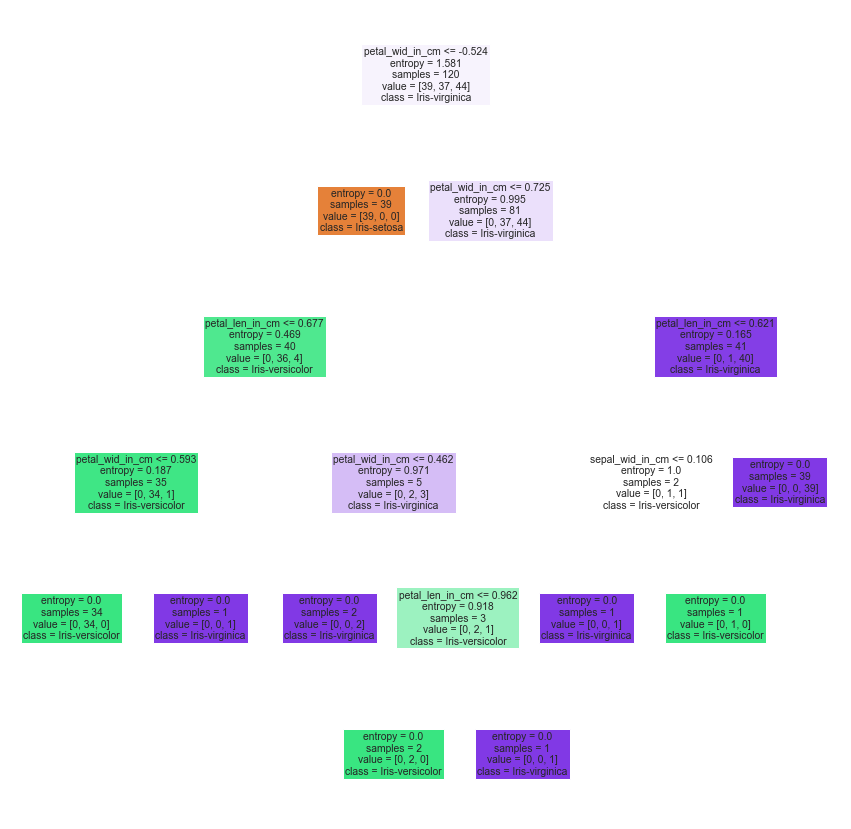

In [19]:
plt.figure(figsize = (15,15))
tree.plot_tree(classifier, feature_names=features, class_names=classnames, filled=True)


### Tree Pruning

In [20]:
train_accuracy = []
validation_accuracy = []
for depth in range(1,7):
    dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=0)
    dt_model.fit(X_train, y_train)
    train_accuracy.append(dt_model.score(X_train, y_train))
    validation_accuracy.append(dt_model.score(X_test, y_test))

In [21]:
frame = pd.DataFrame({'max_depth':range(1,7), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame

,max_depth,train_acc,valid_acc
0,1,0.691667,0.566667
1,2,0.958333,0.966667
2,3,0.966667,0.966667
3,4,0.991667,1.000000
4,5,1.000000,1.000000
5,6,1.000000,1.000000


No handles with labels found to put in legend.


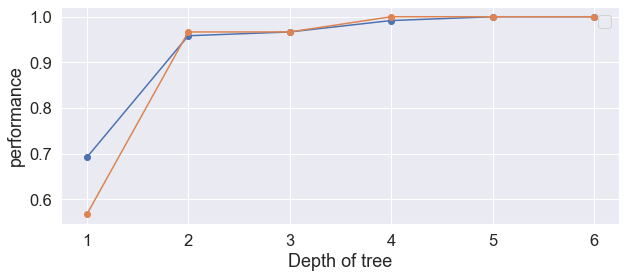

In [22]:
plt.figure(figsize=(10,4))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['valid_acc'], marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend()

When the depth of the tree is 3, We can see that difference between train accuracy and validation accuracy difference is minimum.

We will retrain the model again with tree depth=3

In [23]:
dtree = DecisionTreeClassifier(criterion = 'entropy', max_depth=3, random_state = 0)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [24]:
dtree.score(X_train,y_train)

0.9666666666666667

In [25]:
dtree.score(X_test,y_test)

0.9666666666666667

In [26]:
y_pred = dtree.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print(accuracy_score(y_test,y_pred))
print()
print(confusion_matrix(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))

0.9666666666666667

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



[Text(209.25, 475.65000000000003, 'petal_wid_in_cm <= -0.524\nentropy = 1.581\nsamples = 120\nvalue = [39, 37, 44]\nclass = Iris-virginica'),
 Text(139.5, 339.75, 'entropy = 0.0\nsamples = 39\nvalue = [39, 0, 0]\nclass = Iris-setosa'),
 Text(279.0, 339.75, 'petal_wid_in_cm <= 0.725\nentropy = 0.995\nsamples = 81\nvalue = [0, 37, 44]\nclass = Iris-virginica'),
 Text(139.5, 203.85000000000002, 'petal_len_in_cm <= 0.677\nentropy = 0.469\nsamples = 40\nvalue = [0, 36, 4]\nclass = Iris-versicolor'),
 Text(69.75, 67.94999999999999, 'entropy = 0.187\nsamples = 35\nvalue = [0, 34, 1]\nclass = Iris-versicolor'),
 Text(209.25, 67.94999999999999, 'entropy = 0.971\nsamples = 5\nvalue = [0, 2, 3]\nclass = Iris-virginica'),
 Text(418.5, 203.85000000000002, 'petal_len_in_cm <= 0.621\nentropy = 0.165\nsamples = 41\nvalue = [0, 1, 40]\nclass = Iris-virginica'),
 Text(348.75, 67.94999999999999, 'entropy = 1.0\nsamples = 2\nvalue = [0, 1, 1]\nclass = Iris-versicolor'),
 Text(488.25, 67.94999999999999, 'e

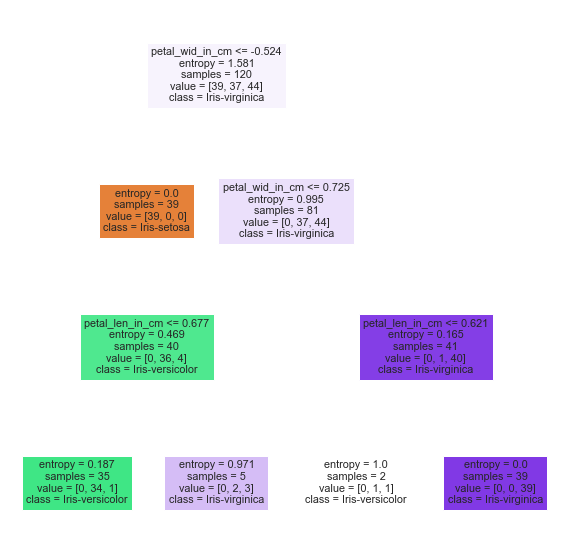

In [38]:
%matplotlib inline
fig=plt.figure(figsize = (10,10))
tree.plot_tree(dtree, feature_names=features, class_names=classnames, filled = True)